In [97]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline

palette = ['#F5DF4D', '#939597', '#0F4C81', '#FF6F61', '#5F4B8B', '#88B04B', '#92A8D1', '#F7CAC9', '#955251',\
           '#B163A3', '#009473']
palette.reverse()

In [98]:
tesla = pd.read_csv('D:\\CubeAI Internship\\Task-8 TSLA Analysis\\TSLA_historical_data.csv')
tesla.head()

,Date,Open,High,Low,Close,Adj Close,Volume,stock
0,5/29/2024,174.190002,178.149994,173.929993,176.190002,176.190002,54684300,TSLA
1,5/28/2024,176.399994,178.250000,173.160004,176.750000,176.750000,59736600,TSLA
2,5/24/2024,174.839996,180.080002,173.729996,179.240005,179.240005,65479700,TSLA
3,5/23/2024,181.800003,181.899994,173.259995,173.740005,173.740005,71975500,TSLA
4,5/22/2024,182.850006,183.800003,178.119995,180.110001,180.110001,88313500,TSLA


In [99]:
tesla.set_index('Date')


,Open,High,Low,Close,Adj Close,Volume,stock
Date,,,,,,,
5/29/2024,174.190002,178.149994,173.929993,176.190002,176.190002,54684300,TSLA
5/28/2024,176.399994,178.250000,173.160004,176.750000,176.750000,59736600,TSLA
5/24/2024,174.839996,180.080002,173.729996,179.240005,179.240005,65479700,TSLA
5/23/2024,181.800003,181.899994,173.259995,173.740005,173.740005,71975500,TSLA
5/22/2024,182.850006,183.800003,178.119995,180.110001,180.110001,88313500,TSLA
...,...,...,...,...,...,...,...
7/6/2010,1.333333,1.333333,1.055333,1.074000,1.074000,103003500,TSLA
7/2/2010,1.533333,1.540000,1.247333,1.280000,1.280000,77097000,TSLA
7/1/2010,1.666667,1.728000,1.351333,1.464000,1.464000,123282000,TSLA


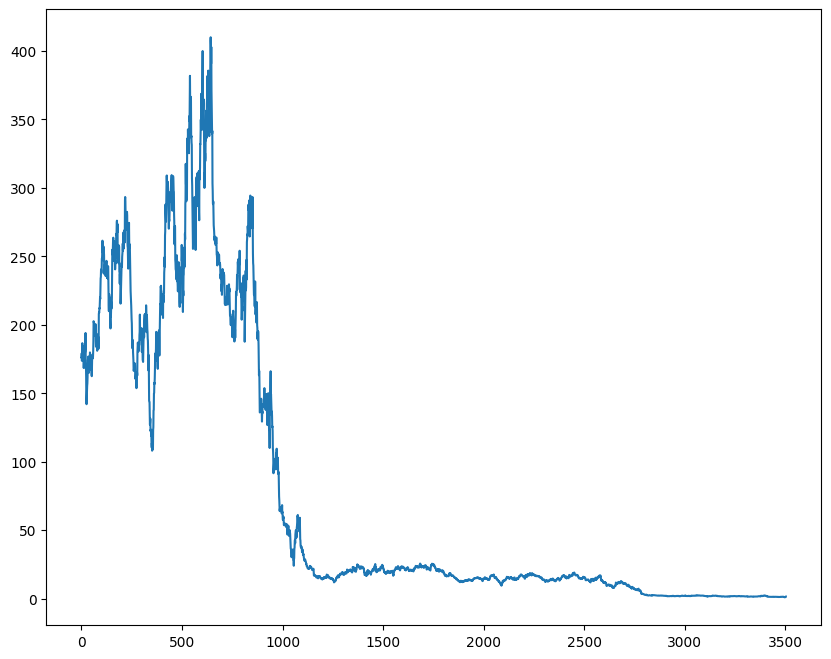

In [100]:
plt.figure(figsize=(10, 8))
tesla['Close'].plot()
plt.show()

In [101]:
tesla['PriceDiff'] = tesla['Close'].shift(-1) - tesla['Close']
print(tesla['PriceDiff'])

0       0.559998
1       2.490005
2      -5.500000
3       6.369995
4       6.490005
          ...   
3498    0.206000
3499    0.184000
3500    0.124667
3501    0.004000
3502         NaN
Name: PriceDiff, Length: 3503, dtype: float64


In [102]:
tesla['Return'] = tesla['PriceDiff'] /tesla['Close']
print(tesla['Return'])

0       0.003178
1       0.014088
2      -0.030685
3       0.036664
4       0.036034
          ...   
3498    0.191806
3499    0.143750
3500    0.085155
3501    0.002518
3502         NaN
Name: Return, Length: 3503, dtype: float64


#### Using Moving average, 

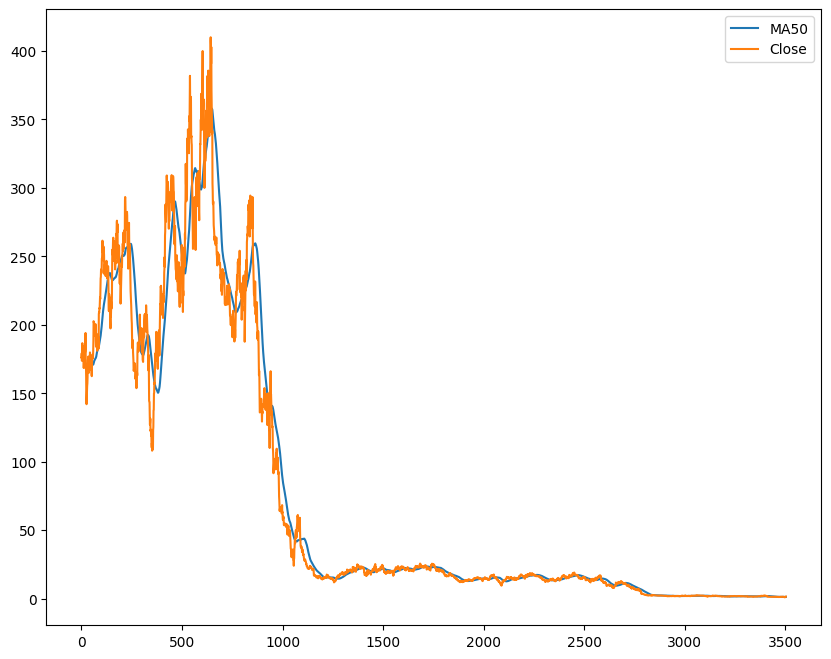

In [103]:
tesla['ma50'] = tesla['Close'].rolling(50).mean()
#plot the moving average
plt.figure(figsize=(10, 8))
tesla['ma50'].plot(label='MA50')
tesla['Close'].plot(label='Close')
plt.legend()
plt.show()

In [104]:
tesla['MA10'] = tesla['Close'].rolling(10).mean()
tesla['MA50'] = tesla['Close'].rolling(50).mean()
tesla = tesla.dropna()
tesla.head()

,Date,Open,High,Low,Close,Adj Close,Volume,stock,PriceDiff,Return,ma50,MA10,MA50
49,3/19/2024,172.360001,172.820007,167.419998,171.320007,171.320007,77271400,TSLA,2.479996,0.014476,171.759401,173.840002,171.759401
50,3/18/2024,170.020004,174.720001,165.899994,173.800003,173.800003,108214400,TSLA,-10.229996,-0.058861,171.711601,174.557002,171.711601
51,3/15/2024,163.160004,165.179993,160.759995,163.570007,163.570007,96971900,TSLA,-1.070007,-0.006542,171.448001,173.392003,171.448001
52,3/14/2024,167.770004,171.169998,160.509995,162.500000,162.500000,126325700,TSLA,6.979996,0.042954,171.113201,172.063004,171.113201
53,3/13/2024,173.050003,176.050003,169.149994,169.479996,169.479996,106524500,TSLA,8.059998,0.047557,171.028000,171.028003,171.028000


In [105]:
tesla.describe()

,Open,High,Low,Close,Adj Close,Volume,PriceDiff,Return,ma50,MA10,MA50
count,3453.000000,3453.000000,3453.000000,3453.000000,3453.000000,3.453000e+03,3453.000000,3453.000000,3453.000000,3453.000000,3453.000000
mean,72.515885,74.097802,70.804196,72.488693,72.488693,9.689007e+07,-0.049154,-0.000718,73.688183,72.714263,73.688183
std,102.048195,104.300877,99.559673,101.961438,101.961438,7.941284e+07,4.687776,0.035753,101.126413,101.818632,101.126413
min,1.076000,1.108667,0.998667,1.053333,1.053333,1.777500e+06,-47.666657,-0.196110,1.311467,1.210200,1.311467
25%,11.010000,11.313333,10.813333,11.091333,11.091333,4.656600e+07,-0.344000,-0.018859,11.502960,11.119867,11.502960
50%,17.133333,17.388000,16.816668,17.125334,17.125334,8.200200e+07,-0.009333,-0.001219,17.140320,17.096466,17.140320
75%,136.576660,140.000000,134.270004,136.786667,136.786667,1.230780e+08,0.242666,0.016000,152.243199,138.808664,152.243199
max,411.470001,414.496674,405.666656,409.970001,409.970001,9.140820e+08,46.480011,0.266830,357.870532,383.062668,357.870532


In [106]:
# Convert 'Date' column to datetime
tesla['Date'] = pd.to_datetime(tesla['Date'])

tesla['Year'] = tesla['Date'].dt.year

# Calculating average volume by year
average_volume_by_year = tesla.groupby('Year')['Volume'].mean().reset_index()
print("Average volume by year:")
print(average_volume_by_year)


Average volume by year:
    Year        Volume
0   2010  2.169800e+07
1   2011  1.935923e+07
2   2012  1.844694e+07
3   2013  1.261158e+08
4   2014  1.037096e+08
5   2015  6.477487e+07
6   2016  6.918820e+07
7   2017  9.502180e+07
8   2018  1.291816e+08
9   2019  1.373838e+08
10  2020  2.259239e+08
11  2021  8.217489e+07
12  2022  8.693633e+07
13  2023  1.373222e+08
14  2024  1.052452e+08


In [107]:
# Final close price
final_close_price = tesla['Close'].iloc[-1]
print("Final close price:", final_close_price)

# Highest close price
highest_close_price = tesla['Close'].max()
print("Highest close price:", highest_close_price)

# Lowest close price
lowest_close_price = tesla['Close'].min()
print("Lowest close price:", lowest_close_price)

# Average daily volume
average_daily_volume = tesla['Volume'].mean()
print("Average daily volume:", average_daily_volume)

# Average volume by date range
average_volume_by_date_range = tesla.groupby('Year')['Volume'].mean().reset_index()
print("Average volume by date range:")
print(average_volume_by_date_range)

# Best performers in the last 30 days and 365 days
tesla['Profit'] = tesla['Close'].diff()
last_30_days_profit = tesla['Profit'].iloc[-30:].sum()
last_365_days_profit = tesla['Profit'].iloc[-365:].sum()


Final close price: 1.588667035
Highest close price: 409.9700012
Lowest close price: 1.053333044
Average daily volume: 96890069.82334203
Average volume by date range:
    Year        Volume
0   2010  2.169800e+07
1   2011  1.935923e+07
2   2012  1.844694e+07
3   2013  1.261158e+08
4   2014  1.037096e+08
5   2015  6.477487e+07
6   2016  6.918820e+07
7   2017  9.502180e+07
8   2018  1.291816e+08
9   2019  1.373838e+08
10  2020  2.259239e+08
11  2021  8.217489e+07
12  2022  8.693633e+07
13  2023  1.373222e+08
14  2024  1.052452e+08


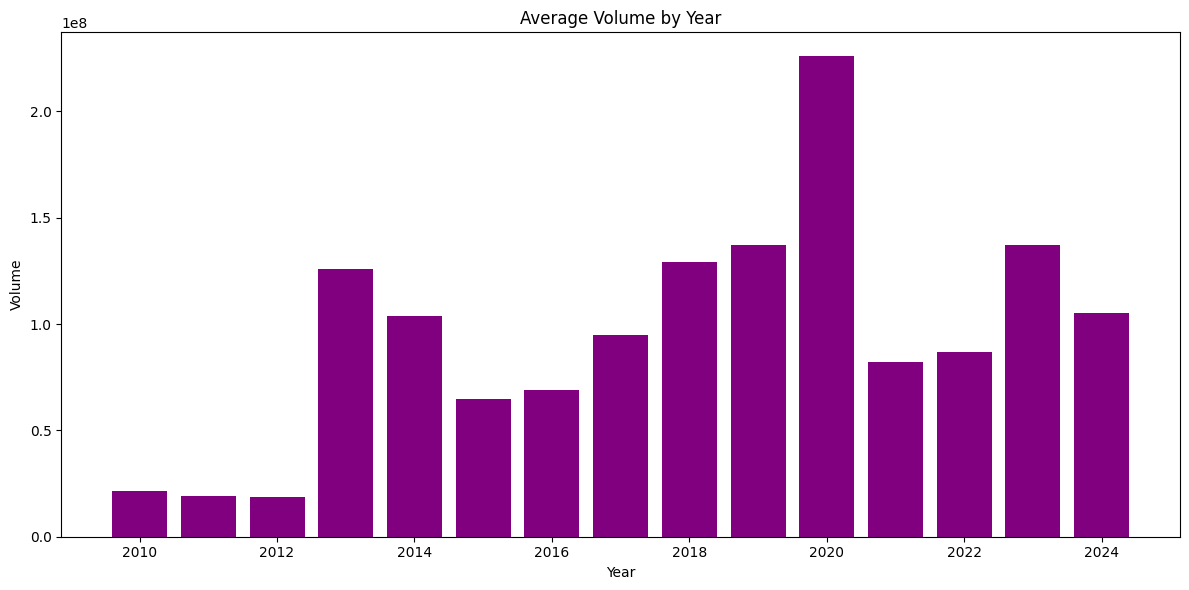

In [108]:


# Set up subplots for better visualization arrangement
fig, axs = plt.subplots(1, 1, figsize=(12, 6))

# Visualize average volume by year
axs.bar(average_volume_by_year['Year'], average_volume_by_year['Volume'], color='purple')
axs.set_title('Average Volume by Year')
axs.set_ylabel('Volume')
axs.set_xlabel('Year')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


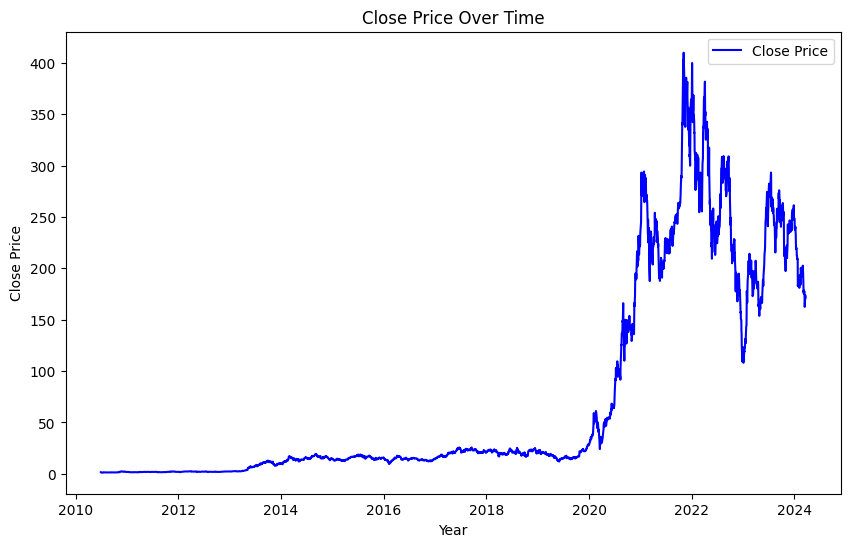

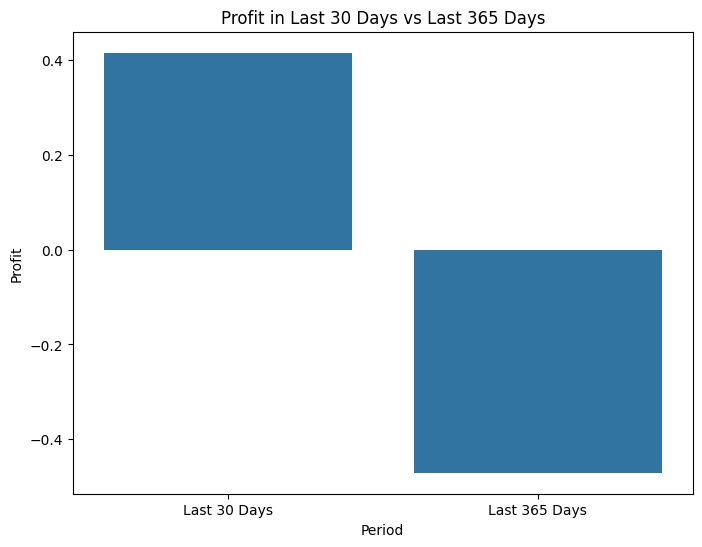

In [110]:
# Comparison of close price within selected time
plt.figure(figsize=(10, 6))
plt.plot(tesla['Date'], tesla['Close'], color='blue', label='Close Price')
plt.xlabel('Year')
plt.ylabel('Close Price')
plt.title('Close Price Over Time')
plt.legend()
plt.show()

# Best performers in the last 30 days and 365 days
profit_data = pd.DataFrame({'Period': ['Last 30 Days', 'Last 365 Days'], 'Profit': [last_30_days_profit, last_365_days_profit]})
plt.figure(figsize=(8, 6))
sns.barplot(x='Period', y='Profit', data=profit_data)
plt.title('Profit in Last 30 Days vs Last 365 Days')
plt.show()
